Predicting the closing stock price of a Apple Inc. using the past 20 day stock price by an artificial recurrent neural network called LSTM.

In [1]:
# Importing the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# Getting the News articles data
news = pd.read_csv("News_articles_dataset.csv", parse_dates=['Date'])
news.head()

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-02-01,What to expect from Apple in 2015 beyond its s...
2,2015-03-01,Mountie: An inexpensive and innovative way to ...
3,2015-04-01,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."


In [3]:
news.isnull().sum()

Date         0
Headlines    0
dtype: int64

In [4]:
news.sort_index(inplace=True)

In [5]:
news.head()

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-02-01,What to expect from Apple in 2015 beyond its s...
2,2015-03-01,Mountie: An inexpensive and innovative way to ...
3,2015-04-01,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."


In [6]:
# Get the stock Historical Data
historical_data = pd.read_csv('HistoricalData_APPLE.csv', parse_dates = ['Date'])
historical_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,$127.13,56877940,$127.21,$127.75,$126.52
1,2021-06-08,$126.74,74403770,$126.60,$128.46,$126.21
2,2021-06-07,$125.90,71057550,$126.17,$126.32,$124.83
3,2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
4,2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13


In [7]:
historical_data.sort_values('Date', inplace=True)

In [8]:
historical_data.reset_index()

,index,Date,Close/Last,Volume,Open,High,Low
0,2515,2011-06-10,$11.64,433801306,$11.81,$11.85,$11.63
1,2514,2011-06-13,$11.66,329376468,$11.69,$11.73,$11.61
2,2513,2011-06-14,$11.87,333995906,$11.79,$11.90,$11.76
3,2512,2011-06-15,$11.67,395841722,$11.78,$11.80,$11.60
4,2511,2011-06-16,$11.61,507299317,$11.68,$11.74,$11.37
...,...,...,...,...,...,...,...
2511,4,2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13
2512,3,2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
2513,2,2021-06-07,$125.90,71057550,$126.17,$126.32,$124.83
2514,1,2021-06-08,$126.74,74403770,$126.60,$128.46,$126.21


In [9]:
historical_data.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [10]:
data = pd.merge(news, historical_data, how='inner', on=['Date'])

In [11]:
data.head()

,Date,Headlines,Close/Last,Volume,Open,High,Low
0,2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",$31.06,161852560,$31.21,$31.28,$30.78
1,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",$32.24,229396000,$31.53,$32.53,$31.33
2,2015-06-01,"Technology Transforming Cars Into ""Phones On W...",$32.63,128064080,$32.80,$32.85,$32.51
3,2015-07-01,Apple issues fourth developer beta of OS X 10....,$31.65,120827560,$31.73,$31.74,$31.50
4,2015-09-01,Samsung is reportedly making a secret new chip...,$26.93,306248680,$27.54,$27.97,$26.84


In [12]:
data.tail()

,Date,Headlines,Close/Last,Volume,Open,High,Low
1590,2021-05-27,&quot;Friends: The Reunion&quot;: The Best Non...,$125.28,94625600,$126.44,$127.64,$125.08
1591,2021-05-28,Apple pushes back launch of podcast subscripti...,$124.61,71311110,$125.57,$125.80,$124.55
1592,2021-01-06,Judge dismisses charges against Apple security...,$126.60,155088000,$127.72,$131.05,$126.38
1593,2021-04-06,"Global equities nearly grasp all-time record, ...",$126.21,80171250,$126.50,$127.13,$125.65
1594,2021-05-06,Apple employees want more remote-work flexibil...,$129.74,78128330,$127.89,$129.75,$127.13


In [13]:
# Removing $ sign and converting the string numeric values to float values
data["Close/Last"] = data["Close/Last"].str.replace('$', '').astype(float)
data["Open"] = data["Open"].str.replace('$', '').astype(float)
data["High"] = data["High"].str.replace('$', '').astype(float)
data["Low"] = data["Low"].str.replace('$', '').astype(float)

In [14]:
data.head()

,Date,Headlines,Close/Last,Volume,Open,High,Low
0,2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",31.06,161852560,31.21,31.28,30.78
1,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",32.24,229396000,31.53,32.53,31.33
2,2015-06-01,"Technology Transforming Cars Into ""Phones On W...",32.63,128064080,32.80,32.85,32.51
3,2015-07-01,Apple issues fourth developer beta of OS X 10....,31.65,120827560,31.73,31.74,31.50
4,2015-09-01,Samsung is reportedly making a secret new chip...,26.93,306248680,27.54,27.97,26.84


In [15]:
data.set_index("Date", inplace = True)
data.head()

,Headlines,Close/Last,Volume,Open,High,Low
Date,,,,,,
2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",31.06,161852560,31.21,31.28,30.78
2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",32.24,229396000,31.53,32.53,31.33
2015-06-01,"Technology Transforming Cars Into ""Phones On W...",32.63,128064080,32.80,32.85,32.51
2015-07-01,Apple issues fourth developer beta of OS X 10....,31.65,120827560,31.73,31.74,31.50
2015-09-01,Samsung is reportedly making a secret new chip...,26.93,306248680,27.54,27.97,26.84


In [16]:
data.sort_index(ascending=True,inplace=True)
data.head()

,Headlines,Close/Last,Volume,Open,High,Low
Date,,,,,,
2015-01-02,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",27.33,212575080,27.85,27.86,26.84
2015-01-05,"Apple Watch interest described as &quot;tepid,...",26.56,256843520,27.07,27.16,26.35
2015-01-06,Apple&quot;s TV Service Delayed: Getting Local...,26.57,262729000,26.64,26.86,26.16
2015-01-07,Apple Inc. leaks new iPod colors in iTunes 12....,26.94,159933400,26.80,27.05,26.67
2015-01-08,Nomura Begins Coverage on Apple (AAPL) IBM cou...,27.97,236675040,27.31,28.04,27.18


In [17]:
# Get the number of rows and columns in the data set
data.shape

(1595, 6)

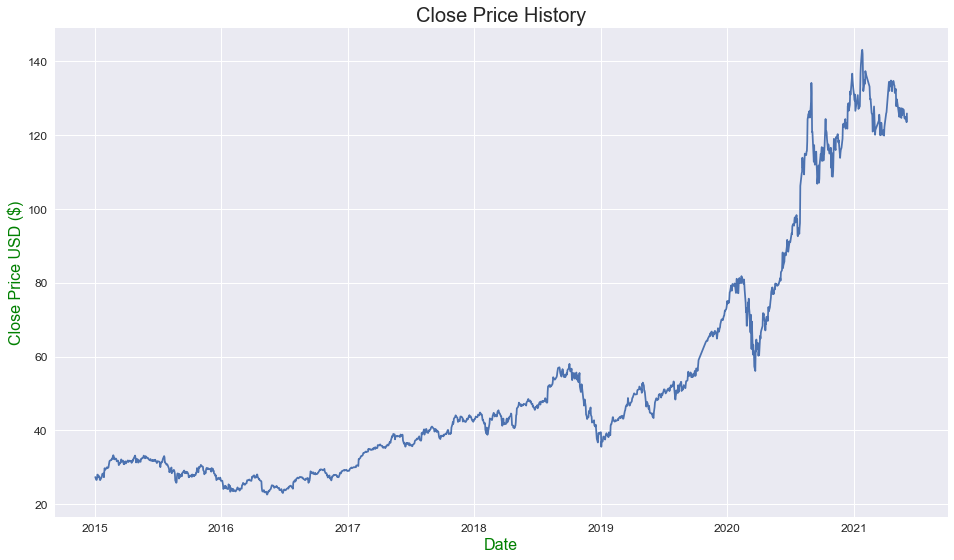

In [18]:
# Visualizing the closing price history
plt.figure(figsize=(16,9))
plt.title('Close Price History', fontsize = 20)
plt.plot(data['Close/Last'])
plt.xlabel('Date', fontsize = 16, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 16, color = 'g')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [19]:
import os

In [20]:
data.to_csv('News and Historical data append.csv')

In [21]:
os.getcwd()

'C:\\Users\\Abhi\\Desktop\\LSTM Deploy'

In [22]:
data['compound'] = ''
data['negative'] = ''
data['neutral'] = ''
data['positive'] = ''
data.head()

,Headlines,Close/Last,Volume,Open,High,Low,compound,negative,neutral,positive
Date,,,,,,,,,,
2015-01-02,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",27.33,212575080,27.85,27.86,26.84,,,,
2015-01-05,"Apple Watch interest described as &quot;tepid,...",26.56,256843520,27.07,27.16,26.35,,,,
2015-01-06,Apple&quot;s TV Service Delayed: Getting Local...,26.57,262729000,26.64,26.86,26.16,,,,
2015-01-07,Apple Inc. leaks new iPod colors in iTunes 12....,26.94,159933400,26.80,27.05,26.67,,,,
2015-01-08,Nomura Begins Coverage on Apple (AAPL) IBM cou...,27.97,236675040,27.31,28.04,27.18,,,,


In [23]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Abhi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
data['compound'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['compound'])
data['negative'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['neg'])
data['neutral'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['neu'])
data['positive'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['pos'])

# displaying the stock data
data.head()

,Headlines,Close/Last,Volume,Open,High,Low,compound,negative,neutral,positive
Date,,,,,,,,,,
2015-01-02,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",27.33,212575080,27.85,27.86,26.84,0.1943,0.116,0.749,0.135
2015-01-05,"Apple Watch interest described as &quot;tepid,...",26.56,256843520,27.07,27.16,26.35,0.9748,0.061,0.831,0.107
2015-01-06,Apple&quot;s TV Service Delayed: Getting Local...,26.57,262729000,26.64,26.86,26.16,0.9932,0.034,0.862,0.105
2015-01-07,Apple Inc. leaks new iPod colors in iTunes 12....,26.94,159933400,26.80,27.05,26.67,0.9866,0.059,0.812,0.129
2015-01-08,Nomura Begins Coverage on Apple (AAPL) IBM cou...,27.97,236675040,27.31,28.04,27.18,0.4939,0.059,0.827,0.114


In [25]:
data.columns

Index(['Headlines', 'Close/Last', 'Volume', 'Open', 'High', 'Low', 'compound',
       'negative', 'neutral', 'positive'],
      dtype='object')

In [26]:
#data.drop('Headlines', inplace=True, axis=1)

# rearranging the columns of the whole stock_data
data = data[['Close/Last', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

# displaying the final stock_data
data.head()

,Close/Last,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,27.33,0.1943,0.116,0.749,0.135,27.85,27.86,26.84,212575080
2015-01-05,26.56,0.9748,0.061,0.831,0.107,27.07,27.16,26.35,256843520
2015-01-06,26.57,0.9932,0.034,0.862,0.105,26.64,26.86,26.16,262729000
2015-01-07,26.94,0.9866,0.059,0.812,0.129,26.80,27.05,26.67,159933400
2015-01-08,27.97,0.4939,0.059,0.827,0.114,27.31,28.04,27.18,236675040


In [27]:
data.to_csv('stock_data.csv')

In [28]:
stock_data = pd.read_csv('stock_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data.head()

,Close/Last,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,27.33,0.1943,0.116,0.749,0.135,27.85,27.86,26.84,212575080
2015-01-05,26.56,0.9748,0.061,0.831,0.107,27.07,27.16,26.35,256843520
2015-01-06,26.57,0.9932,0.034,0.862,0.105,26.64,26.86,26.16,262729000
2015-01-07,26.94,0.9866,0.059,0.812,0.129,26.80,27.05,26.67,159933400
2015-01-08,27.97,0.4939,0.059,0.827,0.114,27.31,28.04,27.18,236675040


In [29]:
stock_data.shape

(1595, 9)

In [30]:
stock_data.isna().any()

Close/Last    False
compound      False
negative      False
neutral       False
positive      False
Open          False
High          False
Low           False
Volume        False
dtype: bool

In [31]:
stock_data.describe(include='all')

,Close/Last,compound,negative,neutral,positive,Open,High,Low,Volume
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1.595000e+03
mean,52.394389,0.684189,0.056418,0.841326,0.102266,52.377392,52.937975,51.815367,1.430715e+08
std,30.375865,0.613326,0.030016,0.039193,0.031983,30.409668,30.820107,29.928693,7.032894e+07
min,22.590000,-0.999500,0.000000,0.666000,0.000000,22.500000,22.920000,22.370000,4.544820e+07
25%,30.335000,0.836050,0.037000,0.819000,0.081000,30.285000,30.565000,30.115000,9.483556e+07
50%,42.610000,0.978300,0.052000,0.845000,0.101000,42.620000,42.970000,42.310000,1.255845e+08
75%,56.765000,0.993900,0.070000,0.867000,0.121000,56.900000,57.260000,56.435000,1.698299e+08
max,143.160000,0.999600,0.241000,1.000000,0.242000,143.600000,145.090000,141.370000,6.475300e+08


In [32]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1595 entries, 2015-01-02 to 2021-06-04
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  1595 non-null   float64
 1   compound    1595 non-null   float64
 2   negative    1595 non-null   float64
 3   neutral     1595 non-null   float64
 4   positive    1595 non-null   float64
 5   Open        1595 non-null   float64
 6   High        1595 non-null   float64
 7   Low         1595 non-null   float64
 8   Volume      1595 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 124.6+ KB


In [33]:
# capturing data to be used for each column
close_price = stock_data.iloc[:,0] #close

# printing close price
print("Close Price:")
close_price

Close Price:


Date
2015-01-02     27.33
2015-01-05     26.56
2015-01-06     26.57
2015-01-07     26.94
2015-01-08     27.97
               ...  
2021-05-28    124.61
2021-06-01    124.28
2021-06-02    125.06
2021-06-03    123.54
2021-06-04    125.89
Name: Close/Last, Length: 1595, dtype: float64

In [34]:
# concatenating the captured training data into a dataframe
need_data = pd.concat([close_price], axis=1)

# setting column names of the revised stock data
need_data.columns = ['close_price']  
need_data.tail(20)

,close_price
Date,
2021-05-03,132.54
2021-05-04,127.85
2021-05-05,128.10
2021-05-06,129.74
2021-05-13,124.97
2021-05-14,127.45
2021-05-17,126.27
2021-05-18,124.85
2021-05-19,124.69


In [35]:
# Convert the dataframe to a numpy array
dataset = need_data.values

In [36]:
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1276

In [37]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.03931326]
 [0.03292693]
 [0.03300987]
 ...
 [0.84987974]
 [0.83727295]
 [0.85676371]]


In [38]:
# Create the training data set
train_data = scaled_data[0:training_data_len , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
past_days = 20
for i in range(past_days, len(train_data)):
    x_train.append(train_data[i-past_days:i, :])
    y_train.append(train_data[i, 0])
    if i<= past_days:
        print(x_train)
        print(y_train)
        print()

[array([[0.03931326],
       [0.03292693],
       [0.03300987],
       [0.03607863],
       [0.04462138],
       [0.0448702 ],
       [0.03914738],
       [0.04122087],
       [0.04030853],
       [0.03417102],
       [0.03242929],
       [0.03806917],
       [0.0398109 ],
       [0.04569959],
       [0.04694368],
       [0.0471925 ],
       [0.0389815 ],
       [0.05175417],
       [0.05921871],
       [0.05556938]])]
[0.05863813552293276]



In [39]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.03931326],
        [0.03292693],
        [0.03300987],
        ...,
        [0.05175417],
        [0.05921871],
        [0.05556938]],

       [[0.03292693],
        [0.03300987],
        [0.03607863],
        ...,
        [0.05921871],
        [0.05556938],
        [0.05863814]],

       [[0.03300987],
        [0.03607863],
        [0.04462138],
        ...,
        [0.05556938],
        [0.05863814],
        [0.05863814]],

       ...,

       [[0.40209007],
        [0.41378452],
        [0.41353571],
        ...,
        [0.46902214],
        [0.47142739],
        [0.47457908]],

       [[0.41378452],
        [0.41353571],
        [0.4171021 ],
        ...,
        [0.47142739],
        [0.47457908],
        [0.47267148]],

       [[0.41353571],
        [0.4171021 ],
        [0.42149789],
        ...,
        [0.47457908],
        [0.47267148],
        [0.45326366]]])

In [41]:
print(x_train.shape)
print(y_train.shape)

(1256, 20, 1)
(1256,)


In [42]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(160, return_sequences=True, activation = "tanh", input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(80, return_sequences= False, activation = "tanh"))
model.add(Dense(60))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 160)           103680    
_________________________________________________________________
dropout (Dropout)            (None, 20, 160)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 80)                77120     
_________________________________________________________________
dense (Dense)                (None, 60)                4860      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 185,721
Trainable params: 185,721
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
# Train the model
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min',verbose = 1,patience = 5)

history = model.fit(x_train, y_train, batch_size = 64, epochs = 100, verbose = 1, validation_split = 0.2, callbacks = [early_stop])

Epoch 1/100
16/16 [==============================] - 31s 163ms/step - loss: 0.0053 - val_loss: 7.0302e-04
Epoch 2/100
16/16 [==============================] - 1s 58ms/step - loss: 3.7573e-04 - val_loss: 0.0015
Epoch 3/100
16/16 [==============================] - 1s 63ms/step - loss: 2.0937e-04 - val_loss: 2.5991e-04
Epoch 4/100
16/16 [==============================] - 1s 66ms/step - loss: 1.2272e-04 - val_loss: 3.4644e-04
Epoch 5/100
16/16 [==============================] - 1s 68ms/step - loss: 1.0720e-04 - val_loss: 2.8393e-04
Epoch 6/100
16/16 [==============================] - 1s 66ms/step - loss: 1.1502e-04 - val_loss: 4.5666e-04
Epoch 7/100
16/16 [==============================] - 1s 69ms/step - loss: 1.1465e-04 - val_loss: 2.2716e-04
Epoch 8/100
16/16 [==============================] - 1s 67ms/step - loss: 9.8203e-05 - val_loss: 3.5652e-04
Epoch 9/100
16/16 [==============================] - 1s 66ms/step - loss: 9.8904e-05 - val_loss: 4.3110e-04
Epoch 10/100
16/16 [==============

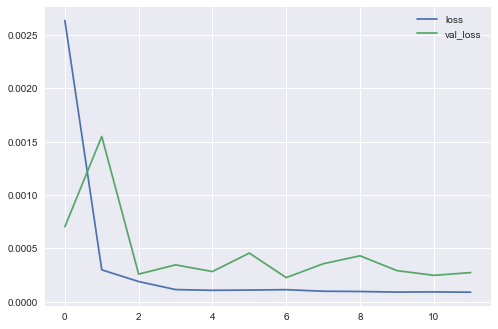

In [45]:
# Plotting loss
loss = pd.DataFrame(model.history.history)
loss.plot()

In [46]:
# Create the testing data set
test_data = scaled_data[training_data_len - past_days: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, 0]
for i in range(past_days, len(test_data)):
    x_test.append(test_data[i-past_days:i, :])

In [47]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [48]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [49]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [50]:
predictions

array([[ 77.951035],
       [ 78.06372 ],
       [ 78.24335 ],
       [ 78.21946 ],
       [ 78.02518 ],
       [ 77.905136],
       [ 77.88672 ],
       [ 78.01805 ],
       [ 78.160866],
       [ 78.319046],
       [ 78.44997 ],
       [ 78.66599 ],
       [ 78.88925 ],
       [ 79.11077 ],
       [ 79.211624],
       [ 79.29119 ],
       [ 79.297134],
       [ 79.12787 ],
       [ 78.59005 ],
       [ 77.64574 ],
       [ 76.58937 ],
       [ 75.20612 ],
       [ 73.686424],
       [ 72.598305],
       [ 71.75679 ],
       [ 71.402664],
       [ 71.238525],
       [ 71.15214 ],
       [ 70.71436 ],
       [ 70.39061 ],
       [ 69.99332 ],
       [ 69.12436 ],
       [ 68.476814],
       [ 67.42837 ],
       [ 66.34839 ],
       [ 65.23504 ],
       [ 64.13916 ],
       [ 62.865246],
       [ 61.460033],
       [ 60.44965 ],
       [ 59.7955  ],
       [ 59.627357],
       [ 59.6593  ],
       [ 59.983788],
       [ 60.426296],
       [ 60.72097 ],
       [ 60.916065],
       [ 60.9

In [51]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("Root Mean Squared Error = ", rmse)

Root Mean Squared Error =  4.212357245657511


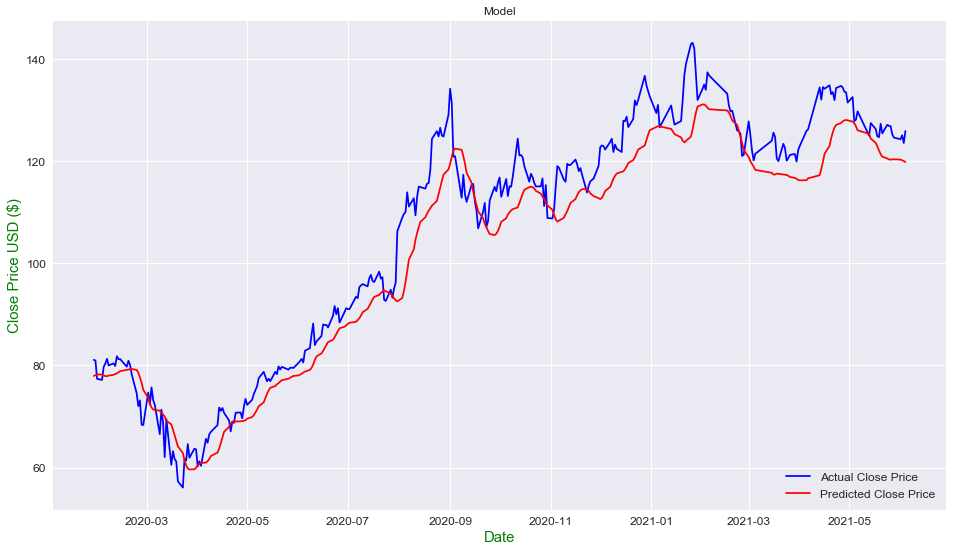

In [52]:
# Plot the data
import copy
valid = copy.deepcopy(data[training_data_len:])
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,9))
plt.title('Model')
plt.xlabel('Date', fontsize= 15, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 15, color = 'g')
plt.plot(valid['Close/Last'], color = 'blue', label = 'Actual Close Price')
plt.plot(valid['Predictions'],  color = 'red', label = 'Predicted Close Price')
plt.legend(loc = 'lower right', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [53]:
# Show the valid and Predicted Prices
valid

,Close/Last,compound,negative,neutral,positive,Open,High,Low,Volume,Predictions
Date,,,,,,,,,,
2020-01-29,81.09,0.9992,0.042,0.809,0.149,81.11,81.96,80.35,216599720,77.951035
2020-01-30,80.97,0.9859,0.081,0.818,0.101,80.14,81.02,79.69,126743240,78.063721
2020-01-31,77.38,0.9901,0.043,0.823,0.134,80.23,80.67,77.07,199588400,78.243347
2020-02-03,77.17,0.8500,0.088,0.829,0.083,76.08,78.37,75.56,173985600,78.219460
2020-02-04,79.71,0.9563,0.047,0.868,0.085,78.83,79.91,78.41,136616520,78.025177
...,...,...,...,...,...,...,...,...,...,...
2021-05-28,124.61,0.9937,0.049,0.845,0.105,125.57,125.80,124.55,71311110,120.354591
2021-06-01,124.28,0.9976,0.046,0.836,0.118,125.08,125.35,123.94,67637120,120.292480
2021-06-02,125.06,0.7719,0.070,0.835,0.095,124.28,125.24,124.05,59278860,120.153854


### Predicting Close price for next day after the Historical data ends

In [54]:
# Getting next day from where the Historical Dataset ends
import datetime

last_day = data.index[-1]
next_day = last_day + datetime.timedelta(days = 1)
print(next_day)

2021-06-05 00:00:00


In [55]:
# Create a new dataframe
new_df = data.filter(['Close/Last'])
# Get the last 20 day closing price values and convert the dataframe to an array
last_20_days = new_df[-20: ].values
# Scale the data to be values between 0 and 1
last_20_days_scaled = scaler.transform(last_20_days)
# Create an empty list
X_test = []
# Append the past 20 days
X_test.append(last_20_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print('Predicted Close Price for {} '.format(next_day) + ' = ', pred_price)

Predicted Close Price for 2021-06-05 00:00:00  =  [[119.70328]]


In [56]:
previous = pred_price
previous_pred_price = new_df.at[str(last_day), 'Close/Last']

In [57]:
diff=(float)(pred_price - previous_pred_price)
if(diff < 0):
  print("percentage decrease = ",round(((- (diff)/previous_pred_price)*100),4))
else:
  print("percentage increase = ",round((( (diff)/previous_pred_price)*100),4))

percentage decrease =  4.9144


In [58]:
# Saving model in .h5 format
model.save('model.h5')